<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_of_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. A review of statistical terms

### 1.1 Variance & Standard Deviation
Suppose we have a list of widgets. What is the mean, variance, and standard deviation of this list?

In [0]:
# here's the list.
widgets = [451, 330, 570, 390, 410]

In [0]:
# which libraries should we import here?
import math
import numpy as np
import pandas as pd

In [0]:
# find the mean
total = sum(widgets)
mean_widgets = total/len(widgets)
mean_widgets

430.2

#### Variance

In [0]:
# first write a little function 
def subtract_mean(number):
  return number-mean_widgets


# Note: this can be converted to lambda for efficiency:
lambda x:x-mean_widgets

<function __main__.<lambda>>

In [0]:
# use `map` to apply that function to our list 
distances = list(map(subtract_mean, widgets))
distances

[20.80000000000001,
 -100.19999999999999,
 139.8,
 -40.19999999999999,
 -20.19999999999999]

In [0]:
# square and sum all of those distances
squared_distances = list(map(lambda x:x**2, distances))

In [0]:
# how long is our list?
list_length = len(squared_distances)-1  # for a sample taken from a population
list_length = len(squared_distances) # for a whole population (no sample)

list_length

5

In [0]:
# calculate variance
variance_widgets = sum(squared_distances)/list_length
variance_widgets

6408.160000000001

#### standard dev

In [0]:
# calculate the standard deviation
math.sqrt(variance_widgets)

80.05098375410512

In [0]:
# check our work using numpy
np.mean(widgets)

430.2

In [0]:
# var
np.var(widgets)

6408.160000000001

In [0]:
# std dev
np.std(widgets)

80.05098375410512

In [0]:
# check our work using pandas
df = pd.DataFrame({'widgets':widgets})
df

,widgets
0,451
1,330
2,570
3,390
4,410


In [0]:
# mean
df['widgets'].mean()

430.2

In [0]:
# var and std for a population
print(df['widgets'].var(ddof=0))
print(df['widgets'].std(ddof=0))

6408.160000000001
80.05098375410512


In [0]:
# var and std for a sample
print(df['widgets'].var(ddof=1))
print(df['widgets'].std(ddof=1))

8010.200000000001
89.49972066995517


### 1.2 Covariance
Find the covariance between widgets and gadgets.

In [0]:
# make a new list
gadgets = [410, 505, 371, 220, 625]

In [0]:
# using numpy
np.cov(widgets, gadgets)

array([[ 8010.2 , -2919.05],
       [-2919.05, 22889.7 ]])

In [0]:
# convert to a dataframe
pd.DataFrame(np.cov(widgets, gadgets))

,0,1
0,8010.20,-2919.05
1,-2919.05,22889.70


In [0]:
# using pandas
df['gadgets'] = pd.Series(gadgets)
df

,widgets,gadgets
0,451,410
1,330,505
2,570,371
3,390,220
4,410,625


In [0]:
# use pandas to find cov
df.cov()

,widgets,gadgets
widgets,8010.20,-2919.05
gadgets,-2919.05,22889.70


### 1.3 Correlation Coefficient 
Find the correlation coefficient that summarizes the relationship between widgets and gadgets. 

In [0]:
# Calculate the standard dev of both lists using pandas.
std_w = df['widgets'].std(ddof=1)
std_g = df['gadgets'].std(ddof=1)

In [0]:
# Calculate covariance using pandas
cov_wg = df['widgets'].cov(df['gadgets'])

In [0]:
# Calculate the denominator
denom = std_w*std_g
denom

13540.719144122293

In [0]:
# Calculate correlation
corr_wg = cov_wg/denom
corr_wg

-0.2155756994093693

In [0]:
## Check work using pandas
df['widgets'].corr(df['gadgets'])

-0.21557569940936924

In [0]:
# A shorter way to do this
df.corr()

,widgets,gadgets
widgets,1.000000,-0.215576
gadgets,-0.215576,1.000000


### 1.4 The Variance-Covariance Matrix
Import a dataset of residential properties in Washington DC. Calculate the variance-covariance matrix and correlation matrix for the dataset's numeric columns.

In [0]:
# source: https://www.kaggle.com/christophercorrea/dc-residential-properties/
url = 'https://raw.githubusercontent.com/austinlasseter/dash-scatterplot-housing/master/dchouses.csv'
houses = pd.read_csv(url)
houses.head()

,BATHRM,HF_BATHRM,KITCHENS,HEAT,AC,ROOMS,PRICE
0,1,1,1.0,Forced Air,Y,6,NaN
1,2,1,1.0,Hot Water Rad,Y,8,460000.0
2,1,0,1.0,Hot Water Rad,N,6,NaN
3,1,0,1.0,Hot Water Rad,N,6,NaN
4,3,1,1.0,Warm Cool,Y,7,410220.0


In [0]:
houses.shape

(1000, 7)

In [0]:
# calculate the covariance for the entire dataset
houses.cov()

,BATHRM,HF_BATHRM,KITCHENS,ROOMS,PRICE
BATHRM,1.007166,0.125448,0.329582,1.866127e+00,-5.164766e+05
HF_BATHRM,0.125448,0.340972,-0.067744,4.989159e-01,4.109166e+05
KITCHENS,0.329582,-0.067744,0.420696,9.291807e-01,-6.497264e+03
ROOMS,1.866127,0.498916,0.929181,7.218137e+00,-3.030853e+06
PRICE,-516476.554036,410916.625989,-6497.264022,-3.030853e+06,1.551202e+14


In [0]:
# calculate the correlation for the entire dataset
houses.corr()

,BATHRM,HF_BATHRM,KITCHENS,ROOMS,PRICE
BATHRM,1.000000,0.214070,0.461896,0.692115,-0.042109
HF_BATHRM,0.214070,1.000000,-0.173102,0.318021,0.058728
KITCHENS,0.461896,-0.173102,1.000000,0.592760,-0.021364
ROOMS,0.692115,0.318021,0.592760,1.000000,-0.088273
PRICE,-0.042109,0.058728,-0.021364,-0.088273,1.000000


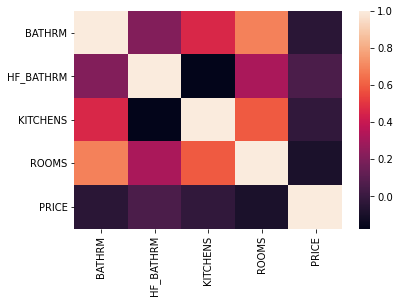

In [0]:
# heatmap
import seaborn as sns
sns.heatmap(houses.corr())

## 2. Orthogonality

### 2.1 Quick review of norm and dot product.

In [0]:
# let's make a couple of vectors.
v = np.array([75, 25, 76])
x = np.random.randint(low=1, high=100, size=3)
print(v, x)

[75 25 76] [60 27 22]


In [0]:
# quick: which one is longer? 
for vect in [v,x]:
  print(np.linalg.norm(vect))

109.66312051004202
69.3757882838098


In [0]:
# what's the dot product of x and v? using array broadcasting
(v[0]*x[0]) + (v[1]*x[1]) + (v[2]*x[2])

6847

In [0]:
# what's the dot product of x and v? using numpy
np.dot(x, v)

6847

In [0]:
# there's another way to write this.
x.dot(v)

6847

### 2.2 Orthogonality

In [0]:
# import
import matplotlib.pyplot as plt

In [0]:
# choose some vectors
vector_1
vector_2

array([-1.6,  2.6])

(-2.0, 3.0)

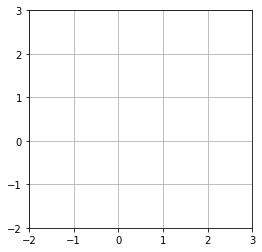

In [0]:
# Set up the figure so that x and y axes are symmetrical.

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,3)          
plt.ylim(-2,3)

# Plot the vectors

Are the following vectors orthogonal?

In [0]:
# If dot product != 0, then vectors are not orthogonal.
a = np.array([-7, 4])
b = np.array([-5, 3])
np.dot(a,b)

47

In [0]:
# If dot product = 0, then vectors are orthogonal.
a = np.array([0, 4])
b = np.array([-5, 0])
np.dot(a,b)

0

In [0]:
# If dot product = 0, then vectors are orthogonal.

In [0]:
# For any vector, generate another vector that is orthogonal to it.
k = np.random.randn(3)
k

array([ 0.60891213, -0.81847151, -0.32390918])

In [0]:
# take any random vector of the same length
x = np.random.randn(3)
x

array([-0.75767655,  0.376137  , -0.87030935])

In [0]:
# make it ortho
y = x - x.dot(k) * k/np.linalg.norm(k)**2
y

array([-0.49865486,  0.02797203, -1.00809524])

In [0]:
x -= x+2

In [0]:
# confirm that it is indeed ortho
print(np.dot(x,k))
print('{:.8f}'.format(np.dot(x,k)))

1.0669371102791891
1.06693711


### 3. Unit Vectors

In [0]:
# what is it?
# simply a vector with length (norm) of 1.
# vectors have 2 props: length and direction.

In [0]:
# Suppose we have a vector f.
f = np.random.randint(low=1, high=100, size=5)
f

array([93, 69, 92, 18, 25])

In [0]:
# how long is it?
norm_f = np.linalg.norm(f)
norm_f

151.07283011845644

In [0]:
# find its unit vector. the hat symbol (f^) indicates it's a unit vector.
f_hat = f/np.linalg.norm(f)
f_hat

array([0.61559713, 0.45673335, 0.6089778 , 0.11914783, 0.1654831 ])

In [0]:
# how long is this?
np.linalg.norm(f_hat)

1.0

## 4. Linear Independence / Dependence 

Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Linearly dependent vectors
vector_1 = [-.8, 1.3]
vector_2 = np.multiply(vector_1, 2)
vector_1, vector_2

([-0.8, 1.3], array([-1.6,  2.6]))

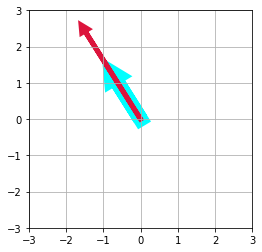

In [0]:
# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

for myvect, mycolor, mywidth in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=mywidth,
            color=mycolor,
            length_includes_head=True);

In [0]:
# Linearly independent vectors, not orthogonal

(-3.0, 3.0)

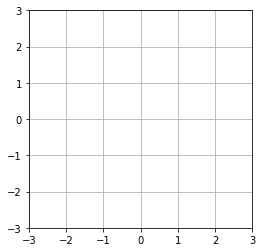

In [0]:
# Set up the grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors

## 5. Span

Suppose we have two vectors. The linear combination is as follows, where a and b are any scalars.

\begin{align}
a\begin{bmatrix} 1 & 3 \end{bmatrix} +
b\begin{bmatrix} 2 & 1 \end{bmatrix}
\end{align}

Note that:
* The set of all possible linear combinations (i.e., all possible values of a and b) is the span of these vectors. 
* A set of vectors _spans_ a space if their linear combinations fill the space.
* The span of most pairs of 2D vectors is the entire infinite sheet of infinite space (unless they are colinear). 

In [0]:
# Let's take two vectors.

(-5.0, 5.0)

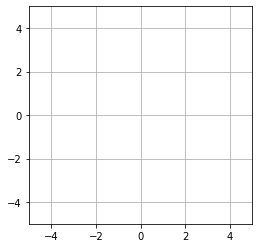

In [0]:
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Display

In [0]:
# This is one possible linear combination:

In [0]:
# This is a set of several linear combinations:

## 6. Basis

In 2-dimensional space $\mathbb{R}^2$, ANY vector (a,b) can be decomposed as the linear combination of the basis vectors (1,0) and (0,1). Since these are unit vectors, they are called "orthonormal basis".

(a,b) = a(1,0) + b(0,1)

In [0]:
# the Roman R indicates the list of all REAL numbers

In [0]:
# find basis vectors in 2-d
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors

## 7. Rank

Rank means the number of dimensions in the output of a transformation. For example, when the output of a transformation is a line, we say the matrix has a rank of 1. If it's a plane, then it's rank 2. Put another way, Rank tells us the number of linearly independent vectors in the row space of a matrix and by extension the space of R^n that is spanned by the vectors of the matrix.
https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7
(start at 8:37)

In [0]:
# Rank two
P = np.array([[1,2,3],
              [4,5,6]])
P

array([[1, 2, 3],
       [4, 5, 6]])

In [0]:
# what is its rank?
np.linalg.matrix_rank(P)

2

In [0]:
# Return a 2-D array with ones on the diagonal and zeros elsewhere.
# Remembr the identity matrix? always square
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [0]:
# what is its rank?
np.linalg.matrix_rank(np.eye(2))

2

In [0]:
# rank three
Q = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
np.linalg.matrix_rank(Q)

2

In [0]:
# rank three
Q = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
np.linalg.matrix_rank(Q)

3

In [0]:
# rank four
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [0]:
# rank four
np.linalg.matrix_rank(np.eye(4))

4

In [0]:
# Rank zero
P = np.array([0])
np.linalg.matrix_rank(P)

0

In [0]:
# compare
np.eye(0)

array([], shape=(0, 0), dtype=float64)

In [0]:
# Rank one
np.eye(1)

array([[1.]])

In [0]:
# Rank one
np.linalg.matrix_rank(np.eye(1))

1

## 8. Linear Projections

Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 

In [0]:
# Original Vector
v = np.array([2,1])
w = np.array([-3,3])
v,w

(array([2, 1]), array([-3,  3]))

In [0]:
# dot product
w_dot_v = np.dot(v,w)
v_dot_v = np.dot(v,v)
w_dot_v, v_dot_v

(-3, 5)

In [0]:
# f
fraction = w_dot_v/v_dot_v
fraction

-0.6

In [0]:
# projection
x = np.multiply(fraction, v)

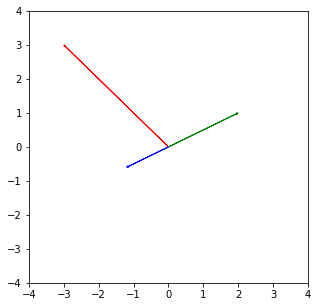

In [0]:
# Plot a line
fig, axes = plt.subplots(1, 1, figsize=(5,5))
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Plot the Scaled Vectors
plt.arrow(0,0, w[0], w[1],head_width=.05, head_length=0.05, color ='red', length_includes_head=True)
plt.arrow(0,0, v[0], v[1],head_width=.05, head_length=0.05, color ='green', length_includes_head=True)

plt.arrow(0,0, x[0], x[1],head_width=.05, head_length=0.05, color ='blue', length_includes_head=True)
plt.show()

In [0]:
# Get Vals for L

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


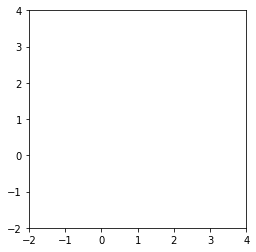

In [0]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L